Para esta prueba se te dan dos archivos: train.csv y test.csv, los cuales contienen información sobre transacciones de tarjetas de crédito y débito. En cada transacción se tiene información numérica y cualitativa (revisar diccionario_variables.csv).

El archivo train.csv contiene los registros etiquetados (si son fraude o no): 1 para FRAUDE y 0 para transacción LEGITIMA.

* El objetivo es desarrollar un modelo (con el archivo train.csv) que permita
predecir si una transacción es fraudulenta o es legítima, para después
evaluarlo con el archivo test.csv.


Los resultados de predicción deben ser presentados en un archivo
test_evaluado.csv.

Nota: utilice el modelo que desee, no importa que sea el más sencillo. Nuevamente, NO estamos evaluando precisión en los resultados, nos interesa la forma en como trabaja y transmite los resultados. Por lo que deberá agregar una explicación de su modelo (breve) y de los resultados obtenidos.

Finalmente, una pequeña sugerencia para mejorar su modelo o qué cambios
realizaría.


importamos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---



Cargamos los datos del dataset de entrenamiento y verificamos el numero de registros y de columnas.

In [2]:
dataTrain = pd.read_csv('train.csv')

print(f'Registros: {dataTrain.shape[0]}')
print(f'Columnas: {dataTrain.shape[1]}')

Registros: 2965
Columnas: 26


In [3]:
dataTrain.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


Obtenemos la informacion del dataTrain.

Se observa que tenemos 3 diferentes tipos:



*   float64 - 13 columnas
*   int64 - 8 columnas
*   objetc(cadenas) - 5 columnas





In [4]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

Verificamos la existencia de valores nulos.

Se observa que hay registros faltantes en las columnas:

* FECHA_VIN            (Fecha de vinculacion del cliente)
* OFICINA_VIN          (Oficina de vinculacion del cliente)
* SEXO                 (M=masculino, F= femenino)
* SEGMENTO             (Segmento del cliente)
* EDAD                 (Edad del cliente)
* INGRESOS             (Ingresos del cliente)
* EGRESOS              (Egresos del cliente)
* Dist_Sum_INTER       (Sumatoria de distancia recorrida a nivel internacional (en millas))
* Dist_Mean_INTER    (Promedio de distancia recorrida a nivel internacional (en millas)
* Dist_Max_INTER     (Distancia maxima a nivel internacional)
* Dist_Mean_NAL      (Distancia promedio a nivel nacional)


In [5]:
dataTrain.isnull().sum()

id                    0
FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
CANAL                 0
DIASEM                0
DIAMES                0
FECHA_VIN            24
OFICINA_VIN          24
SEXO                 55
SEGMENTO             24
EDAD                 24
INGRESOS             24
EGRESOS              24
NROPAISES             0
Dist_Sum_INTER     1547
Dist_Mean_INTER    1547
Dist_Max_INTER     1547
NROCIUDADES           0
Dist_Mean_NAL       457
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64

Se opta por **eliminar 55** registros de las siguientes columnas:

* FECHA_VIN (No se puede asumir en que fecha se vinculo el cliente).
* OFICINA_VIN (No se puede asumir en que sucursal se vinculo el cliente)
* SEXO (Por otra parte, tampoco sabemos el sexo del cliente)
* SEGMENTO (De igual manera, no sabemos a que segmento de la pobración pertenece el cliente)
* EDAD (Ocurre lo mismo con la edad)
* INGRESOS (Es probable que ocurriera un error en el sistema)
* EGRESOS (Ocurre lo mismo que con INGRESOS)

Se opta por eliminar estos registros, ya que no son más del **2%** del conjunto total de entrenamiento.

In [6]:
dataTrain = dataTrain.dropna(subset=['FECHA_VIN', 'OFICINA_VIN', 'SEXO',
                                      'SEGMENTO', 'EDAD', 'INGRESOS', 
                                      'EGRESOS'])

print(f'Registros: {dataTrain.shape[0]}')
print(f'Columnas: {dataTrain.shape[1]}\n')


print(dataTrain.isnull().sum())

Registros: 2910
Columnas: 26

id                    0
FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
CANAL                 0
DIASEM                0
DIAMES                0
FECHA_VIN             0
OFICINA_VIN           0
SEXO                  0
SEGMENTO              0
EDAD                  0
INGRESOS              0
EGRESOS               0
NROPAISES             0
Dist_Sum_INTER     1508
Dist_Mean_INTER    1508
Dist_Max_INTER     1508
NROCIUDADES           0
Dist_Mean_NAL       442
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64


Por otra parte, hay registros que no tienen un valor:



* Dist_Sum_INTER 
* Dist_Mean_INTER 
* Dist_Max_INTER
* Dist_Mean_NAL

Estos se propone un valor igual a 0, indicando que no se hizo algun recorrido el cliente



In [7]:
dataTrain = dataTrain.fillna(0)

print(dataTrain.isnull().sum())

id                 0
FRAUDE             0
VALOR              0
HORA_AUX           0
Dist_max_NAL       0
Canal1             0
FECHA              0
COD_PAIS           0
CANAL              0
DIASEM             0
DIAMES             0
FECHA_VIN          0
OFICINA_VIN        0
SEXO               0
SEGMENTO           0
EDAD               0
INGRESOS           0
EGRESOS            0
NROPAISES          0
Dist_Sum_INTER     0
Dist_Mean_INTER    0
Dist_Max_INTER     0
NROCIUDADES        0
Dist_Mean_NAL      0
Dist_HOY           0
Dist_sum_NAL       0
dtype: int64


Verificamos propiedades estadisticas

In [8]:
def data_describe(dataframe):
  for column in dataframe.columns:
    print(f'Nombre: {column}\n{dataframe[column].describe()}', end='\n\n')

In [9]:
data_describe(dataTrain)

Nombre: id
count    2.910000e+03
mean     6.410310e+09
std      8.362909e+09
min      2.364560e+06
25%      2.520848e+09
50%      6.014596e+09
75%      9.000000e+09
max      9.330050e+10
Name: id, dtype: float64

Nombre: FRAUDE
count    2910.00000
mean        0.24811
std         0.43199
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: FRAUDE, dtype: float64

Nombre: VALOR
count    2.910000e+03
mean     4.913799e+05
std      9.375061e+05
min      0.000000e+00
25%      8.946135e+04
50%      2.418014e+05
75%      5.033689e+05
max      2.001406e+07
Name: VALOR, dtype: float64

Nombre: HORA_AUX
count    2910.000000
mean       14.928179
std         6.353026
min         0.000000
25%        12.000000
50%        16.000000
75%        20.000000
max        23.000000
Name: HORA_AUX, dtype: float64

Nombre: Dist_max_NAL
count    2910.000000
mean      316.115756
std       295.728966
min         1.000000
25%        25.020000
50%       243.620000

Se observan 3 columnas con caracteristicas inusales:

* SEXO (3 elementos)
* EDAD (con un rango de 4 y 133 años)
* SEGMENTO (Con 7 elementos)

Graficamos estas registros


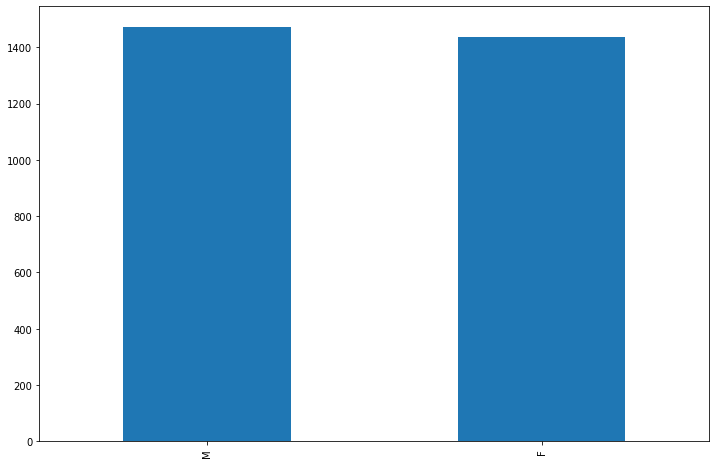

In [10]:
dataTrain['SEXO'].value_counts().plot(kind='bar', figsize=(12,8))
plt.show()

In [11]:
testdata = dataTrain[dataTrain['SEXO'] == 0]

print(f'SEXO con valor (0): {testdata.shape[0]}')

SEXO con valor (0): 0


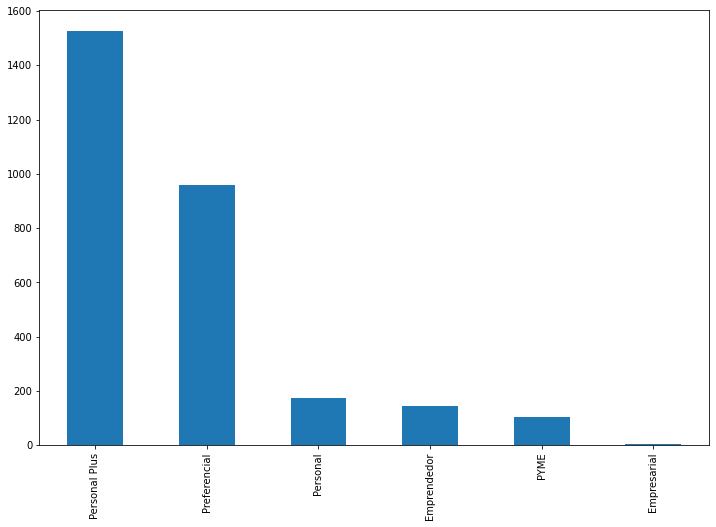

In [12]:
dataTrain['SEGMENTO'].value_counts().plot(kind='bar', figsize=(12,8))

plt.show()

In [13]:
testdata = dataTrain[dataTrain['SEGMENTO'] == 0]

print(f'SEGMENTO con valor (0): {testdata.shape[0]}')

SEGMENTO con valor (0): 0


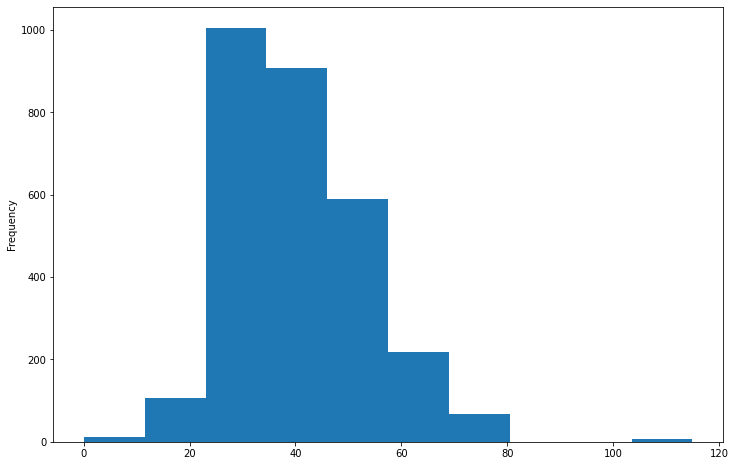

In [14]:
dataTrain['EDAD'].plot(kind = 'hist', figsize=(12,8))

plt.show()

In [15]:
testdata = dataTrain[(dataTrain['EDAD'] < 20) | (dataTrain['EDAD'] > 80)]

print(f'EDAD con valores menores de 20 y mayores a 80: {testdata.shape[0]}')

EDAD con valores menores de 20 y mayores a 80: 30


Si bien, estos registros pueden ser causados por errores humanos, es posible, que sean datos relevantes para identificar las presuntas transacciones fraudulentas.





Es importante separar los datos númericos de los categoricos, hacer un preprocesamiento adecuado de cada uno de ellos

In [16]:
numericalTest = dataTrain.drop(['FRAUDE'],
                               axis=1).select_dtypes('number').columns

categoricalTest = dataTrain.select_dtypes('object').columns

print(f'Columnas numericas:  {dataTrain[numericalTest].shape[1]}')
print(f'Columnas categoricas: {dataTrain[categoricalTest].shape[1]}')

Columnas numericas:  20
Columnas categoricas: 5


Se realiza el tratado de los datos categoricos

In [52]:
from sklearn import preprocessing

def transform_categorical_data(data):
  categorical = list(data.select_dtypes('object').columns)

  for column in categorical:
    label_encoder = preprocessing.LabelEncoder()
    
    data[column] = label_encoder.fit_transform(data[column])



In [69]:
testdata = dataTrain.copy()

In [70]:
transform_categorical_data(dataTrain)

Si bien, teniendo los datos limpios, es importante corroborar los datos que nos ayuden al entrenamiento de los modelos que se propogan, por ende, es necesario conocer la coorelacion entre estos datos. 

En este caso se usa la correlación de Pearson, que indica que entre mas cerca este de **1** esta fuertemente correlacionado, mientras, que si se encuentra cerca de **-1**, ocurre lo contrario.

Se observa, que las distancias estan fuertemente correlacionadas, por ende, se opta por eliminarlas, ya que pueden influir en mayor medida a un sobreajuste de los modelos:

In [71]:
corr = dataTrain.corr(method='pearson')
corr.style.background_gradient()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
id,1.000000,0.036245,-0.012770,0.015079,-0.028850,-0.097743,-0.023958,-0.026207,-0.059423,0.030263,-0.023958,0.157240,0.019279,-0.087227,-0.051520,-0.209978,-0.045557,-0.037102,-0.023887,-0.006793,-0.022263,-0.021713,-0.046707,0.012689,-0.025130,-0.067479
FRAUDE,0.036245,1.000000,0.106834,-0.064651,0.059475,-0.532945,0.019631,-0.282292,-0.423894,0.135419,0.019631,0.157779,-0.051962,-0.062410,-0.071365,-0.092186,-0.048681,-0.050399,-0.097251,-0.107310,-0.098249,-0.108805,-0.090293,0.100843,-0.004767,-0.013371
VALOR,-0.012770,0.106834,1.000000,0.078601,0.020817,0.030107,0.058361,-0.014988,-0.039029,0.096211,0.058361,-0.080451,0.014000,0.031846,0.021051,0.046351,0.056339,0.024936,0.099231,0.031506,0.062134,0.065271,-0.036469,0.043555,0.013437,0.014830
HORA_AUX,0.015079,-0.064651,0.078601,1.000000,-0.019438,0.004943,-0.019312,0.044942,-0.032199,0.078531,-0.019312,0.007503,0.011729,0.006354,-0.004440,-0.001490,0.027814,-0.000411,0.055842,0.010364,0.040735,0.040130,-0.038406,-0.017843,0.018037,-0.028618
Dist_max_NAL,-0.028850,0.059475,0.020817,-0.019438,1.000000,0.100181,-0.045536,-0.052793,0.025994,-0.009942,-0.045536,-0.079455,0.077014,0.114741,0.144103,-0.021670,0.039346,-0.032712,0.076447,0.070320,0.032932,0.050587,0.464145,0.759352,0.011779,0.673698
Canal1,-0.097743,-0.532945,0.030107,0.004943,0.100181,1.000000,0.038349,0.263117,0.806307,-0.085931,0.038349,-0.276386,0.076217,0.093826,0.222312,0.174938,0.097916,0.058939,0.179215,0.142765,0.204232,0.196849,0.194902,0.024809,0.045608,0.147212
FECHA,-0.023958,0.019631,0.058361,-0.019312,-0.045536,0.038349,1.000000,-0.127699,0.000962,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.038938,-0.005554,0.012956,0.009656,-0.109803,0.039812,-0.033673
COD_PAIS,-0.026207,-0.282292,-0.014988,0.044942,-0.052793,0.263117,-0.127699,1.000000,0.179574,-0.040618,-0.127699,-0.093508,0.003493,0.034293,0.009549,0.097307,-0.016711,-0.019026,-0.029391,-0.030134,0.043037,0.026921,0.007529,-0.011024,0.302974,0.028936
CANAL,-0.059423,-0.423894,-0.039029,-0.032199,0.025994,0.806307,0.000962,0.179574,1.000000,-0.050101,0.000962,-0.116864,0.016886,0.041629,0.129107,0.082856,0.030307,0.047215,0.076802,0.085423,0.146268,0.115346,0.109649,-0.005894,-0.019256,0.068131
DIASEM,0.030263,0.135419,0.096211,0.078531,-0.009942,-0.085931,0.141870,-0.040618,-0.050101,1.000000,0.141870,0.033092,0.059107,-0.010309,-0.031237,0.006783,0.021077,0.054354,-0.003831,-0.002526,-0.032918,-0.019842,-0.054715,-0.001754,0.001718,-0.030414


Se procede a eliminar las siguientes columnas:

* Dist_Sum_INTER
* Dist_Mean_INTER
* Dist_Max_INTER

In [72]:
dataTrain = dataTrain.drop(['Dist_Sum_INTER', 'Dist_Mean_INTER', 'Dist_Max_INTER'], axis=1)

In [73]:
corr = dataTrain.corr(method='pearson')
corr.style.background_gradient()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
id,1.000000,0.036245,-0.012770,0.015079,-0.028850,-0.097743,-0.023958,-0.026207,-0.059423,0.030263,-0.023958,0.157240,0.019279,-0.087227,-0.051520,-0.209978,-0.045557,-0.037102,-0.023887,-0.046707,0.012689,-0.025130,-0.067479
FRAUDE,0.036245,1.000000,0.106834,-0.064651,0.059475,-0.532945,0.019631,-0.282292,-0.423894,0.135419,0.019631,0.157779,-0.051962,-0.062410,-0.071365,-0.092186,-0.048681,-0.050399,-0.097251,-0.090293,0.100843,-0.004767,-0.013371
VALOR,-0.012770,0.106834,1.000000,0.078601,0.020817,0.030107,0.058361,-0.014988,-0.039029,0.096211,0.058361,-0.080451,0.014000,0.031846,0.021051,0.046351,0.056339,0.024936,0.099231,-0.036469,0.043555,0.013437,0.014830
HORA_AUX,0.015079,-0.064651,0.078601,1.000000,-0.019438,0.004943,-0.019312,0.044942,-0.032199,0.078531,-0.019312,0.007503,0.011729,0.006354,-0.004440,-0.001490,0.027814,-0.000411,0.055842,-0.038406,-0.017843,0.018037,-0.028618
Dist_max_NAL,-0.028850,0.059475,0.020817,-0.019438,1.000000,0.100181,-0.045536,-0.052793,0.025994,-0.009942,-0.045536,-0.079455,0.077014,0.114741,0.144103,-0.021670,0.039346,-0.032712,0.076447,0.464145,0.759352,0.011779,0.673698
Canal1,-0.097743,-0.532945,0.030107,0.004943,0.100181,1.000000,0.038349,0.263117,0.806307,-0.085931,0.038349,-0.276386,0.076217,0.093826,0.222312,0.174938,0.097916,0.058939,0.179215,0.194902,0.024809,0.045608,0.147212
FECHA,-0.023958,0.019631,0.058361,-0.019312,-0.045536,0.038349,1.000000,-0.127699,0.000962,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,-0.109803,0.039812,-0.033673
COD_PAIS,-0.026207,-0.282292,-0.014988,0.044942,-0.052793,0.263117,-0.127699,1.000000,0.179574,-0.040618,-0.127699,-0.093508,0.003493,0.034293,0.009549,0.097307,-0.016711,-0.019026,-0.029391,0.007529,-0.011024,0.302974,0.028936
CANAL,-0.059423,-0.423894,-0.039029,-0.032199,0.025994,0.806307,0.000962,0.179574,1.000000,-0.050101,0.000962,-0.116864,0.016886,0.041629,0.129107,0.082856,0.030307,0.047215,0.076802,0.109649,-0.005894,-0.019256,0.068131
DIASEM,0.030263,0.135419,0.096211,0.078531,-0.009942,-0.085931,0.141870,-0.040618,-0.050101,1.000000,0.141870,0.033092,0.059107,-0.010309,-0.031237,0.006783,0.021077,0.054354,-0.003831,-0.054715,-0.001754,0.001718,-0.030414


Se observa una correlación alta de **Dist_Mean_NAL** y **Dist_sum_NAL** respecto de **Canal1**, por ende. Se propone eliminar las 2 columnas sobrantes de las distancias. Debido a que Canal1 contiene datofonos, debido a que no tiene una correlación alta con otras caracteristicas.

In [74]:
dataTrain = dataTrain.drop(['Dist_Mean_NAL', 'Dist_sum_NAL'], axis=1)

In [75]:
corr = dataTrain.corr(method='pearson')
corr.style.background_gradient()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
id,1.000000,0.036245,-0.012770,0.015079,-0.028850,-0.097743,-0.023958,-0.026207,-0.059423,0.030263,-0.023958,0.157240,0.019279,-0.087227,-0.051520,-0.209978,-0.045557,-0.037102,-0.023887,-0.046707,-0.025130
FRAUDE,0.036245,1.000000,0.106834,-0.064651,0.059475,-0.532945,0.019631,-0.282292,-0.423894,0.135419,0.019631,0.157779,-0.051962,-0.062410,-0.071365,-0.092186,-0.048681,-0.050399,-0.097251,-0.090293,-0.004767
VALOR,-0.012770,0.106834,1.000000,0.078601,0.020817,0.030107,0.058361,-0.014988,-0.039029,0.096211,0.058361,-0.080451,0.014000,0.031846,0.021051,0.046351,0.056339,0.024936,0.099231,-0.036469,0.013437
HORA_AUX,0.015079,-0.064651,0.078601,1.000000,-0.019438,0.004943,-0.019312,0.044942,-0.032199,0.078531,-0.019312,0.007503,0.011729,0.006354,-0.004440,-0.001490,0.027814,-0.000411,0.055842,-0.038406,0.018037
Dist_max_NAL,-0.028850,0.059475,0.020817,-0.019438,1.000000,0.100181,-0.045536,-0.052793,0.025994,-0.009942,-0.045536,-0.079455,0.077014,0.114741,0.144103,-0.021670,0.039346,-0.032712,0.076447,0.464145,0.011779
Canal1,-0.097743,-0.532945,0.030107,0.004943,0.100181,1.000000,0.038349,0.263117,0.806307,-0.085931,0.038349,-0.276386,0.076217,0.093826,0.222312,0.174938,0.097916,0.058939,0.179215,0.194902,0.045608
FECHA,-0.023958,0.019631,0.058361,-0.019312,-0.045536,0.038349,1.000000,-0.127699,0.000962,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,0.039812
COD_PAIS,-0.026207,-0.282292,-0.014988,0.044942,-0.052793,0.263117,-0.127699,1.000000,0.179574,-0.040618,-0.127699,-0.093508,0.003493,0.034293,0.009549,0.097307,-0.016711,-0.019026,-0.029391,0.007529,0.302974
CANAL,-0.059423,-0.423894,-0.039029,-0.032199,0.025994,0.806307,0.000962,0.179574,1.000000,-0.050101,0.000962,-0.116864,0.016886,0.041629,0.129107,0.082856,0.030307,0.047215,0.076802,0.109649,-0.019256
DIASEM,0.030263,0.135419,0.096211,0.078531,-0.009942,-0.085931,0.141870,-0.040618,-0.050101,1.000000,0.141870,0.033092,0.059107,-0.010309,-0.031237,0.006783,0.021077,0.054354,-0.003831,-0.054715,0.001718


Se observa nuevamente una alta correlacion entre Canal1 y CANAL, se opta por eliminar **CANAL**, debido a que **Canal1** contiene la información de la transaccion, ademas de los tipos de datafonos

In [76]:
dataTrain = dataTrain.drop(['CANAL'], axis=1)

In [77]:
corr = dataTrain.corr(method='pearson')
corr.style.background_gradient()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
id,1.000000,0.036245,-0.012770,0.015079,-0.028850,-0.097743,-0.023958,-0.026207,0.030263,-0.023958,0.157240,0.019279,-0.087227,-0.051520,-0.209978,-0.045557,-0.037102,-0.023887,-0.046707,-0.025130
FRAUDE,0.036245,1.000000,0.106834,-0.064651,0.059475,-0.532945,0.019631,-0.282292,0.135419,0.019631,0.157779,-0.051962,-0.062410,-0.071365,-0.092186,-0.048681,-0.050399,-0.097251,-0.090293,-0.004767
VALOR,-0.012770,0.106834,1.000000,0.078601,0.020817,0.030107,0.058361,-0.014988,0.096211,0.058361,-0.080451,0.014000,0.031846,0.021051,0.046351,0.056339,0.024936,0.099231,-0.036469,0.013437
HORA_AUX,0.015079,-0.064651,0.078601,1.000000,-0.019438,0.004943,-0.019312,0.044942,0.078531,-0.019312,0.007503,0.011729,0.006354,-0.004440,-0.001490,0.027814,-0.000411,0.055842,-0.038406,0.018037
Dist_max_NAL,-0.028850,0.059475,0.020817,-0.019438,1.000000,0.100181,-0.045536,-0.052793,-0.009942,-0.045536,-0.079455,0.077014,0.114741,0.144103,-0.021670,0.039346,-0.032712,0.076447,0.464145,0.011779
Canal1,-0.097743,-0.532945,0.030107,0.004943,0.100181,1.000000,0.038349,0.263117,-0.085931,0.038349,-0.276386,0.076217,0.093826,0.222312,0.174938,0.097916,0.058939,0.179215,0.194902,0.045608
FECHA,-0.023958,0.019631,0.058361,-0.019312,-0.045536,0.038349,1.000000,-0.127699,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,0.039812
COD_PAIS,-0.026207,-0.282292,-0.014988,0.044942,-0.052793,0.263117,-0.127699,1.000000,-0.040618,-0.127699,-0.093508,0.003493,0.034293,0.009549,0.097307,-0.016711,-0.019026,-0.029391,0.007529,0.302974
DIASEM,0.030263,0.135419,0.096211,0.078531,-0.009942,-0.085931,0.141870,-0.040618,1.000000,0.141870,0.033092,0.059107,-0.010309,-0.031237,0.006783,0.021077,0.054354,-0.003831,-0.054715,0.001718
DIAMES,-0.023958,0.019631,0.058361,-0.019312,-0.045536,0.038349,1.000000,-0.127699,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,0.039812


Se observa que **Dist_max_NAL**, tiene una correlacion conciderable respecto de **NROCIUDADES**, por ende se elimina

In [78]:
dataTrain = dataTrain.drop(['Dist_max_NAL'], axis=1)

Finalmente, se aprecian datos con una correlacion baja, estos serviran como caracteristicas para el entrenamiento de los modelos propuestos

In [79]:
corr = dataTrain.corr(method='pearson')
corr.style.background_gradient()

,id,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
id,1.000000,0.036245,-0.012770,0.015079,-0.097743,-0.023958,-0.026207,0.030263,-0.023958,0.157240,0.019279,-0.087227,-0.051520,-0.209978,-0.045557,-0.037102,-0.023887,-0.046707,-0.025130
FRAUDE,0.036245,1.000000,0.106834,-0.064651,-0.532945,0.019631,-0.282292,0.135419,0.019631,0.157779,-0.051962,-0.062410,-0.071365,-0.092186,-0.048681,-0.050399,-0.097251,-0.090293,-0.004767
VALOR,-0.012770,0.106834,1.000000,0.078601,0.030107,0.058361,-0.014988,0.096211,0.058361,-0.080451,0.014000,0.031846,0.021051,0.046351,0.056339,0.024936,0.099231,-0.036469,0.013437
HORA_AUX,0.015079,-0.064651,0.078601,1.000000,0.004943,-0.019312,0.044942,0.078531,-0.019312,0.007503,0.011729,0.006354,-0.004440,-0.001490,0.027814,-0.000411,0.055842,-0.038406,0.018037
Canal1,-0.097743,-0.532945,0.030107,0.004943,1.000000,0.038349,0.263117,-0.085931,0.038349,-0.276386,0.076217,0.093826,0.222312,0.174938,0.097916,0.058939,0.179215,0.194902,0.045608
FECHA,-0.023958,0.019631,0.058361,-0.019312,0.038349,1.000000,-0.127699,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,0.039812
COD_PAIS,-0.026207,-0.282292,-0.014988,0.044942,0.263117,-0.127699,1.000000,-0.040618,-0.127699,-0.093508,0.003493,0.034293,0.009549,0.097307,-0.016711,-0.019026,-0.029391,0.007529,0.302974
DIASEM,0.030263,0.135419,0.096211,0.078531,-0.085931,0.141870,-0.040618,1.000000,0.141870,0.033092,0.059107,-0.010309,-0.031237,0.006783,0.021077,0.054354,-0.003831,-0.054715,0.001718
DIAMES,-0.023958,0.019631,0.058361,-0.019312,0.038349,1.000000,-0.127699,0.141870,1.000000,0.047503,-0.028306,0.032980,-0.088511,-0.007386,0.004167,-0.033595,0.052755,0.009656,0.039812
FECHA_VIN,0.157240,0.157779,-0.080451,0.007503,-0.276386,0.047503,-0.093508,0.033092,0.047503,1.000000,-0.072864,-0.011262,-0.225246,-0.515247,-0.148409,-0.099145,-0.108770,-0.096127,-0.006144




---



# Procedemos a trabajar con los datos de prueba

In [88]:
dataTest = pd.read_csv('test.csv')

print(f'Registros: {dataTest.shape[0]}')
print(f'Columnas: {dataTest.shape[1]}')

Registros: 100
Columnas: 32


In [89]:
dataTest.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,NaN,42230.09,18,1.00,1.00,POS,20150515,US,POS,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,NaN,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,...,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,NaN,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,...,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,NaN,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,...,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,NaN,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00


Se procede a verificar los datos nulos que se encuentren en el conjunto de datos. Se observa una datos faltantes en:

* FRAUDE
* Dist_Sum_INTER
* Dist_Mean_INTER
* Dist_Max_INTER
* Dist_Sum_NAL
* Dist_Mean_NAL

Sin embargo, no se les procedera a hacer un tratamiento, debido a que **FRAUDE** es la columna en la que se procedera a realizar la detección de fraudes. Mientras que en las columnas de distancia, se eliminaran para tener datos homogeneos entre el conjunto de entrenamiento y el de prueba.

In [90]:
print(dataTest.isnull().sum())

id                   0
FRAUDE             100
VALOR                0
HORA_AUX             0
Dist_max_COL         0
Dist_max_INTER       0
Canal1               0
FECHA_FRAUDE         0
COD_PAIS             0
CANAL                0
FECHA                0
DIASEM               0
DIAMES               0
FECHA_VIN            0
OFICINA_VIN          0
SEXO                 0
SEGMENTO             0
EDAD                 0
INGRESOS             0
EGRESOS              0
NROPAISES            0
Dist_Sum_INTER      53
Dist_Mean_INTER     53
Dist_Max_INTER      53
NROCIUDADES          0
Dist_Sum_NAL        21
Dist_Mean_NAL       21
Dist_HOY             0
Dist_sum_NAL         0
Dist_mean_NAL        0
Dist_sum_INTER       0
Dist_mean_INTER      0
dtype: int64


Se obtienen las columnas para el conjunto de pruebas, con ayuda del nombre de las columnas del conjunto de entrenamiento

In [91]:
dataTest = dataTest[dataTrain.columns]

In [92]:
dataTest.head()

,id,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
0,98523068,NaN,42230.09,18,POS,20150515,US,5,15,20150316,611,F,Personal Plus,46,20000000,10000000,1,1,4552.41
1,300237898,NaN,143202.65,20,POS,20150506,US,3,6,19890814,961,F,Preferencial,56,11000000,4500000,3,2,4552.41
2,943273308,NaN,243591.25,2,ATM_INT,20150517,EC,0,17,20051201,218,F,Personal Plus,33,9000000,4000000,3,7,5083.41
3,951645809,NaN,238267.40,20,ATM_INT,20150508,EC,5,8,19990301,113,F,Personal Plus,53,2300000,500000,1,1,904.81
4,963797516,NaN,490403.58,13,ATM_INT,20150501,US,5,1,19910330,85,M,Personal,0,0,0,1,1,4552.41


In [94]:
print(f'Columnas del conjunto de entrenamiento {dataTrain.shape[1]}')
print(f'Columnas del conjunto de pruebas {dataTest.shape[1]}')

Columnas del conjunto de entrenamiento 19
Columnas del conjunto de pruebas 19


Se realiza el procesamiento de las variables categoricas

In [101]:
transform_categorical_data(dataTest)

dataTest.head()

,id,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
0,98523068,NaN,42230.09,18,1,20150515,7,5,15,20150316,611,0,3,46,20000000,10000000,1,1,4552.41
1,300237898,NaN,143202.65,20,1,20150506,7,3,6,19890814,961,0,4,56,11000000,4500000,3,2,4552.41
2,943273308,NaN,243591.25,2,0,20150517,3,0,17,20051201,218,0,3,33,9000000,4000000,3,7,5083.41
3,951645809,NaN,238267.40,20,0,20150508,3,5,8,19990301,113,0,3,53,2300000,500000,1,1,904.81
4,963797516,NaN,490403.58,13,0,20150501,7,5,1,19910330,85,1,2,0,0,0,1,1,4552.41


Finalmente, se observa la correlación de los datos, sin la columna de fraude



In [103]:
testdata = dataTest.copy()
testdata = testdata.drop('FRAUDE', axis=1)

In [104]:
corr = testdata.corr(method='pearson')
corr.style.background_gradient()

,id,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
id,1.000000,-0.052381,-0.018853,0.048712,0.025794,0.035527,-0.002551,0.025794,-0.135683,-0.035880,-0.090324,0.180387,0.323881,0.029519,-0.040968,-0.148271,0.058590,0.092302
VALOR,-0.052381,1.000000,-0.008553,-0.149651,-0.058004,-0.002823,-0.118324,-0.058004,-0.051671,-0.114686,0.145569,-0.002689,-0.129491,0.387072,0.487708,0.155895,-0.034441,-0.023802
HORA_AUX,-0.018853,-0.008553,1.000000,0.046268,0.108298,0.100825,0.171669,0.108298,0.034230,-0.104088,0.041837,-0.072975,0.043630,0.050947,0.051096,0.091668,-0.024245,-0.013691
Canal1,0.048712,-0.149651,0.046268,1.000000,0.044337,0.296568,-0.005878,0.044337,-0.283373,-0.036591,0.133631,0.222113,0.347178,0.249532,0.206445,0.126516,0.203085,0.109962
FECHA,0.025794,-0.058004,0.108298,0.044337,1.000000,-0.092082,0.226045,1.000000,0.241691,-0.108595,0.168895,-0.161202,-0.098359,-0.040371,-0.113376,0.114778,0.193591,-0.087168
COD_PAIS,0.035527,-0.002823,0.100825,0.296568,-0.092082,1.000000,-0.057644,-0.092082,-0.059959,0.024545,0.060162,0.160573,0.132409,0.086374,0.111644,-0.045162,0.134809,0.213005
DIASEM,-0.002551,-0.118324,0.171669,-0.005878,0.226045,-0.057644,1.000000,0.226045,0.079061,0.032032,0.015226,-0.053781,-0.092979,-0.132173,-0.128381,-0.100328,-0.024406,-0.016338
DIAMES,0.025794,-0.058004,0.108298,0.044337,1.000000,-0.092082,0.226045,1.000000,0.241691,-0.108595,0.168895,-0.161202,-0.098359,-0.040371,-0.113376,0.114778,0.193591,-0.087168
FECHA_VIN,-0.135683,-0.051671,0.034230,-0.283373,0.241691,-0.059959,0.079061,0.241691,1.000000,-0.056922,0.018200,-0.182334,-0.527515,-0.302252,-0.232085,-0.037240,-0.006044,-0.041260
OFICINA_VIN,-0.035880,-0.114686,-0.104088,-0.036591,-0.108595,0.024545,0.032032,-0.108595,-0.056922,1.000000,-0.040507,0.001232,0.003578,-0.017374,-0.128203,-0.012227,-0.047272,-0.158803




---



Procedemos a crear el modelo para entrenar

In [110]:
X_train = dataTrain.drop('FRAUDE', axis=1)
y_train = dataTrain.FRAUDE

In [121]:
X_test = dataTest.drop('FRAUDE', axis=1)
y_test = dataTest.FRAUDE

In [111]:
X_train.head()

,id,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,NROCIUDADES,Dist_HOY
0,9000000001,0.0,13,0,20150501,27,5,1,20120306.0,392.0,1,4,29.0,1200000.0,1200000.0,1,6,4552.41
1,9000000002,0.0,17,0,20150515,27,5,15,20050415.0,716.0,1,4,29.0,5643700.0,500000.0,1,5,4552.41
2,9000000003,0.0,13,0,20150501,27,5,1,20120306.0,392.0,1,4,29.0,1200000.0,1200000.0,1,6,4552.41
3,9000000004,0.0,13,0,20150501,27,5,1,20120306.0,392.0,1,4,29.0,1200000.0,1200000.0,1,6,4552.41
4,9000000005,0.0,0,0,20150510,6,0,10,20141009.0,788.0,1,3,25.0,0.0,0.0,1,1,1482.35


In [115]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: FRAUDE, dtype: int64

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [119]:
y_pred = rf_Classifier.predict(X_test)

In [123]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_pred)
print(cm)
accuracy_score(y_pred,y_pred)

[[66  0]
 [ 0 34]]


1.0